In [1]:
# Load helper file
%run helper_file_1.0.ipynb

The number of bitstrings is: 1024
The counts are: {'000': 497, '111': 527}


In [ ]:
backends = service.backends()
print(backends)

# Chapter 4 - 

In [4]:
!pip install qiskit-aer

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [2]:
from qiskit import BasicAer
backend = BasicAer.get_backend('statevector_simulator')

qc = QuantumCircuit(1,1)

#transpiledQC, result, stateVectorResult = run_sv_circuit(qc, backend)
#transpiledQC, result, stateVectorResult = run_sv_circuit(qc)
transpiledQC, result, stateVectorResult = run_simulated_circuit(qc, backend, None)

#print(stateVectorResult.result().data_bin.meas.get_counts())

#Display the Bloch sphere
plot_bloch_multivector(stateVectorResult)


ImportError: cannot import name 'BasicAer' from 'qiskit' (/usr/local/lib/python3.9/site-packages/qiskit/__init__.py)

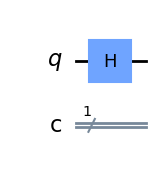

In [5]:
#Place the qubit in a superposition state by adding a Hadamard (H)gate
qc.h(0)
#Draw the circuit
qc.draw()


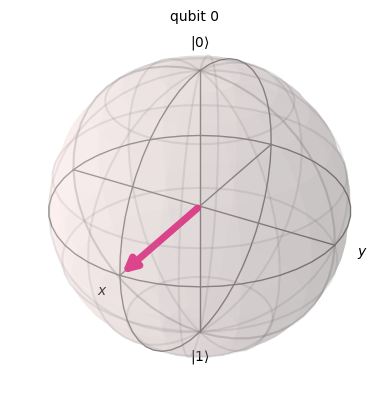

In [6]:
# transpile and run the quantum circuit 
transpiledQC, result, stateVectorResult = run_sv_circuit(qc, backend)

#Display the Bloch sphere
plot_bloch_multivector(stateVectorResult)


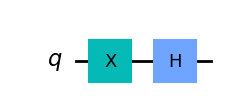

In [7]:
#Reset the circuit
qc = QuantumCircuit(1)
#Rotate the qubit from 0 to 1 using the X (NOT) gate
qc.x(0)
#Add a Hadamard gate
qc.h(0)
#Draw the circuit
qc.draw()


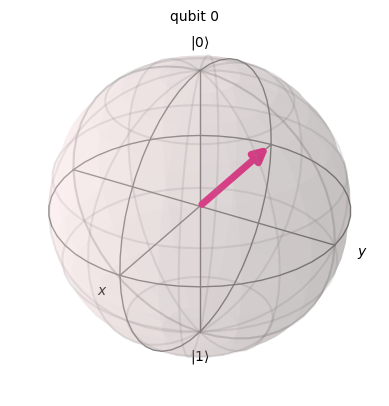

In [8]:
# transpile and run the quantum circuit 
transpiledQC, result, stateVectorResult = run_sv_circuit(qc, backend)

#Display the Bloch sphere
plot_bloch_multivector(stateVectorResult)

In [9]:
#Recreate the circuit
qc = QuantumCircuit(1,1)
#Add a Hadamard gate
qc.h(0)


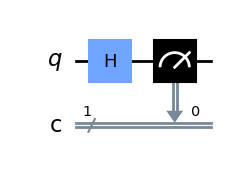

In [10]:
#Create a measurement circuit with 1 qubit and 1 bit
measurement_circuit = QuantumCircuit(1,1)
#Measure function used to map the qubit and bit by their index value on the circuit, respectively
measurement_circuit.measure(0,0)
#Concatenate the circuits together
full_circuit = qc.compose(measurement_circuit)
#Draw the full circuit
full_circuit.draw()


In [11]:
# Run the quantum circuit 
transpiledQC, result = run_qasm_circuit(full_circuit, None, None)

counts = result.get_counts(full_circuit)
print(counts)

{'1': 478, '0': 546}


## Understanding Entanglement

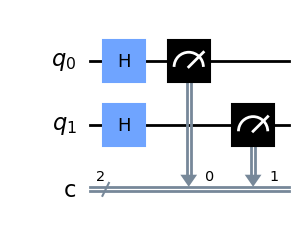

In [12]:
#Create a circuit with 2 qubits and 2 classic bits
qc = QuantumCircuit(2,2)
#Add an H gate to each
qc.h(0)
qc.h(1)
#Measure the qubits to the classical bit
qc.measure([0,1],[0,1])
#Draw the circuit
qc.draw()


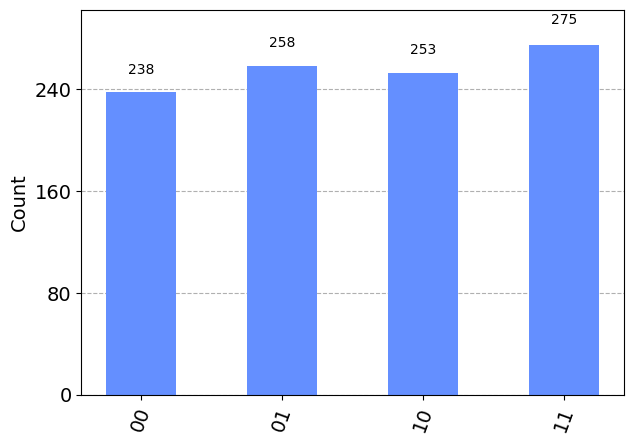

In [14]:
# Run the quantum circuit 
transpiledQC, result = run_qasm_circuit(qc, None, None)

counts = result.get_counts(qc)
plot_histogram(counts)


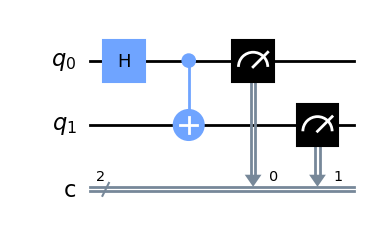

In [15]:
#Create a circuit with 2 qubits and 2 classic bits
qc = QuantumCircuit(2,2)
#Add an H gate to just the first qubit
qc.h(0)
#Add the CNOT gate to entangle the two qubits, where the first qubit is the Control, and the second qubit is the Target. 
qc.cx(0,1)
#Measure the qubits to the classical bit
qc.measure([0,1],[0,1])
#Draw the circuit
qc.draw()


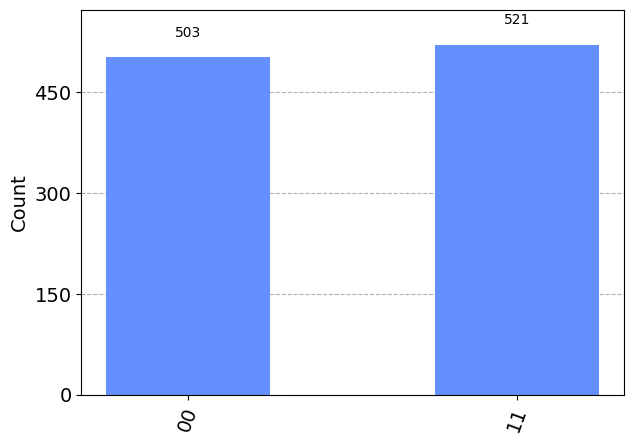

In [16]:
# Run the quantum circuit 
transpiledQC, result = run_qasm_circuit(qc, None, None)

counts = result.get_counts(qc)
plot_histogram(counts)


# Understanding the Bell State

In [17]:
# State 1: |/+>
state1 = QuantumCircuit(2)
# Initialize input to |0,0>
state1.barrier()


In [18]:
# Prepare the Bell state
state1.h(0)


In [19]:
state1.cx(0,1)

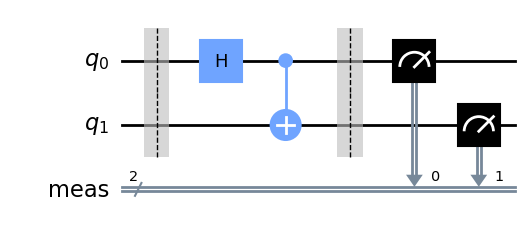

In [20]:
state1.measure_all()
state1.draw()


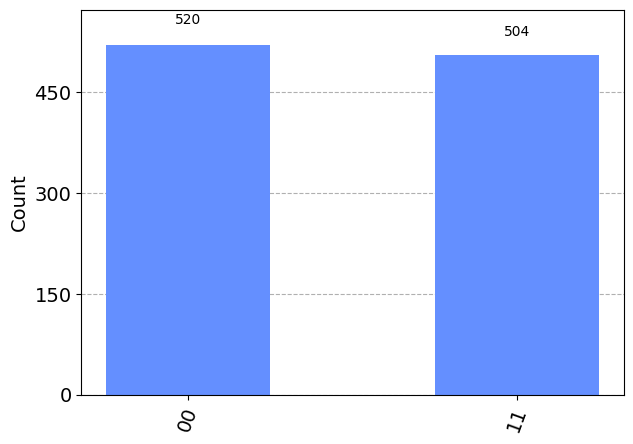

In [23]:
# Execute the Bell state |/+>
transpiled_qc, result = execute_circuit(state1, True, None, None, None)
plot_histogram(result.get_counts(state1))

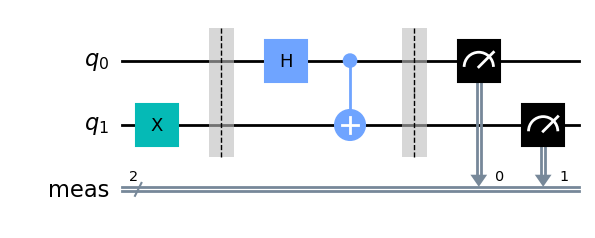

In [24]:
# State 2: |/+>
state2 = QuantumCircuit(2)
# Initialize input state to |1,0>
state2.x(1)
state2.barrier()
# Prepare the Bell state
state2.h(0)
state2.cx(0,1)
state2.measure_all()
state2.draw()


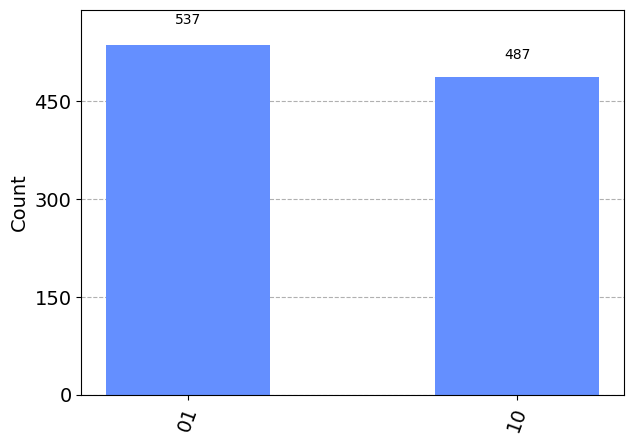

In [27]:
# Execute the Bell state |/+>
transpiled_qc, result = execute_circuit(state2, True, None, None, None)
plot_histogram(result.get_counts(state2))


In [30]:
import qiskit.tools.jupyter
%qiskit_version_table